#Load and Preprocess the Data

In [1]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.datasets import fetch_openml
from scipy.stats import rankdata

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins")

In [3]:
# Check penguin species
penguins['species'].value_counts().sort_values(ascending=False)

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [4]:
# Filter the data frame to include only Adelie and Gentoo penguins
penguins_filtered = penguins[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]

In [5]:
# Check penguin species after filtering
penguins_filtered['species'].value_counts().sort_values(ascending=False)

,count
species,
Adelie,152
Gentoo,124


In [6]:
# Check dataframe shape
penguins_filtered.shape

(276, 7)

In [7]:
# Check dataframe summary
penguins_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            276 non-null    object 
 1   island             276 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   sex                265 non-null    object 
dtypes: float64(4), object(3)
memory usage: 17.2+ KB


In [8]:
# Display dataframe columns
penguins_filtered.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
# Check dataframe stats
penguins_filtered.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693
std,5.195566,2.013410,15.047938,835.933105
min,32.100000,13.100000,172.000000,2850.000000
25%,38.350000,15.000000,190.000000,3600.000000
50%,42.000000,17.000000,198.000000,4262.500000
75%,46.675000,18.500000,215.000000,4950.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
# Rename dataframe
penguins = penguins_filtered.copy()

In [11]:
# Check for null values
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [12]:
# Remove null values, since small number of rows
penguins.dropna(inplace=True)

In [13]:
# Check that null values were removed
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [14]:
# Check dataframe shape
penguins.shape

(265, 7)

In [15]:
# Check penguin gender is a boolean column
penguins['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
# Encode categorical column as a boolean column
penguins['sex'] = LabelEncoder().fit_transform(penguins['sex'])

In [17]:
# Check column
penguins['sex']

,sex
0,1
1,0
2,0
4,0
5,1
...,...
338,0
340,0
341,1
342,0


In [18]:
# Define features and target
X = penguins.drop(columns=['species', 'island'])
y = LabelEncoder().fit_transform(penguins['species'])

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [20]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
247,47.8,15.0,215.0,5650.0,1
308,47.5,14.0,212.0,4875.0,0
23,38.2,18.1,185.0,3950.0,1
96,38.1,18.6,190.0,3700.0,0
257,44.4,17.3,219.0,5250.0,1
...,...,...,...,...,...
25,35.3,18.9,187.0,3800.0,0
263,49.6,15.0,216.0,4750.0,1
77,37.2,19.4,184.0,3900.0,1
112,39.7,17.7,193.0,3200.0,0


In [22]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
254,49.1,14.8,220.0,5150.0,0
121,37.7,19.8,198.0,3500.0,1
102,37.7,16.0,183.0,3075.0,0
29,40.5,18.9,180.0,3950.0,1
14,34.6,21.1,198.0,4400.0,1
145,39.0,18.7,185.0,3650.0,1
332,43.5,15.2,213.0,4650.0,0
51,40.1,18.9,188.0,4300.0,1
260,42.7,13.7,208.0,3950.0,0
131,43.1,19.2,197.0,3500.0,1


In [23]:
y_train

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [24]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0])

In [25]:
# Standardize numerical features to improve performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[ 0.93739329, -0.89826123,  0.81885713,  1.52950046,  1.        ],
       [ 0.87943838, -1.40513208,  0.61762331,  0.61377877, -1.        ],
       [-0.91716374,  0.67303842, -1.1934811 , -0.47917938,  1.        ],
       ...,
       [-1.11034677,  1.33197053, -1.26055904, -0.5382582 ,  1.        ],
       [-0.62738921,  0.47029008, -0.65685757, -1.36536167, -1.        ],
       [-0.93648204,  0.11548048, -1.46179287, -1.39490108, -1.        ]])

In [27]:
X_test

array([[ 1.18853122, -0.9996354 ,  1.15424684,  0.93871227, -1.        ],
       [-1.01375525,  1.53471888, -0.32146787, -1.01088876,  1.        ],
       [-1.01375525, -0.39139037, -1.32763699, -1.51305872, -1.        ],
       [-0.47284279,  1.07853511, -1.52887081, -0.47917938,  1.        ],
       [-1.61262263,  2.19365099, -0.32146787,  0.05252999,  1.        ],
       [-0.76261732,  0.97716094, -1.1934811 , -0.8336523 ,  1.        ],
       [ 0.10670628, -0.79688706,  0.68470125,  0.34792408, -1.        ],
       [-0.550116  ,  1.07853511, -0.99224728, -0.06562765,  1.        ],
       [-0.04784014, -1.55719334,  0.34931154, -0.47917938, -1.        ],
       [ 0.02943307,  1.23059636, -0.38854581, -1.01088876,  1.        ],
       [ 0.62830045, -1.354445  ,  0.95301301,  0.02299058, -1.        ],
       [ 1.0146665 , -1.25307083,  0.48346742,  0.28884526, -1.        ],
       [-0.29897807,  0.87578677, -0.0531561 , -0.56779761,  1.        ],
       [-0.16374995,  1.17990928, -0.5

#Implement Naive Bayes and Logistic Regression models

In [28]:
# Train Naive Bayes and Logistic Regression models
nb_model = GaussianNB()
lr_model = LogisticRegression()

nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Calculate predictions
nb_train_preds = nb_model.predict(X_train)
lr_train_preds = lr_model.predict(X_train)
nb_test_preds = nb_model.predict(X_test)
lr_test_preds = lr_model.predict(X_test)

##1. Accuracy Comparison:



Evaluate and report the accuracy of both the Naive Bayes and Logistic Regression models on the training and
test datasets.

In [30]:
# Calculate Accuracy
nb_train_acc = accuracy_score(y_train, nb_train_preds)
lr_train_acc = accuracy_score(y_train, lr_train_preds)
nb_test_acc = accuracy_score(y_test, nb_test_preds)
lr_test_acc = accuracy_score(y_test, lr_test_preds)

In [31]:
# Print Accuracy results
print(f"Naive Bayes Accuracy (Train): {nb_train_acc:.4f}, (Test): {nb_test_acc:.4f}")
print(f"Logistic Regression Accuracy (Train): {lr_train_acc:.4f}, (Test): {lr_test_acc:.4f}")

Naive Bayes Accuracy (Train): 1.0000, (Test): 1.0000
Logistic Regression Accuracy (Train): 1.0000, (Test): 1.0000


Compare the performance of these models in terms of accuracy to determine which model better distinguishes
between the two penguin species. Provide a brief explanation of your findings.

When tested, the Naive Bayes and Logistic Regression models had 100% accuracy, showing very accurate classification results for both models. Since the penguin dataset is a relatively small numerical dataset, both model types, Naive Bayes (Generative Model) and Logistic Regression (Discriminative Model), work well to classify the penguin species.

However, discriminative models are generally best for classification tasks like penguin species classification as they follow a conditional distribution and work by finding the boundary directly between different classes rather than modeling the input features and finding relationships as a means to classification.

##2. AUC (Area Under the ROC Curve) Comparison:

Calculate the AUC for both Naive Bayes and Logistic Regression on the training and test datasets.

In [32]:
# Compute predicted probabilities
nb_train_probs = nb_model.predict_proba(X_train)[:, 1]
lr_train_probs = lr_model.predict_proba(X_train)[:, 1]
nb_test_probs = nb_model.predict_proba(X_test)[:, 1]
lr_test_probs = lr_model.predict_proba(X_test)[:, 1]

In [33]:
# Compute Area Under the ROC Curve (AUC)
nb_train_auc = roc_auc_score(y_train, nb_train_probs)
lr_train_auc = roc_auc_score(y_train, lr_train_probs)
nb_test_auc = roc_auc_score(y_test, nb_test_probs)
lr_test_auc = roc_auc_score(y_test, lr_test_probs)

In [34]:
# Print AUC results
print(f"Naive Bayes AUC (Train): {nb_train_auc:.4f}, (Test): {nb_test_auc:.4f}")
print(f"Logistic Regression AUC (Train): {lr_train_auc:.4f}, (Test): {lr_test_auc:.4f}")

Naive Bayes AUC (Train): 1.0000, (Test): 1.0000
Logistic Regression AUC (Train): 1.0000, (Test): 1.0000


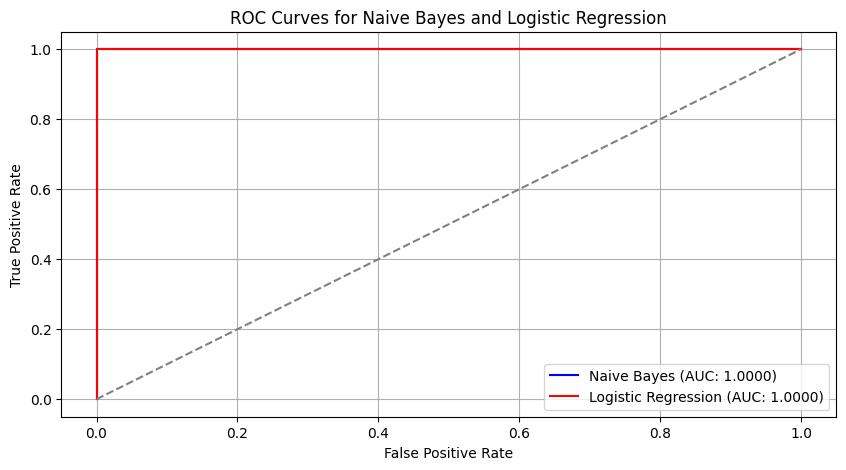

In [35]:
# Plot each ROC Curve
plt.figure(figsize=(10, 5))
for model_name, probs, color in zip(["Naive Bayes", "Logistic Regression"], [nb_test_probs, lr_test_probs], ["blue", "red"]):
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC: {roc_auc_score(y_test, probs):.4f})", color=color)

# Set lines, labels, and titles
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Naive Bayes and Logistic Regression")
plt.legend()
plt.grid()
plt.show()

Interpret the AUC values for both models to assess how effectively each model discriminates between the two penguin species. Provide insights into which model is more effective based on the AUC metric.

The ROC Curve compares the true positive and false positive rates, and the AUC measures the overall model performance. Again, the Naive Bayes and Logistic Regression models had an AUC of 1, showing very effective classification between the penguin species.

Both models work very well on a small structured and tabular dataset with properties of being highly separable and feature-target correlations that are strong indicators of different species. For Naive Bayes, since this is a simple classification task and the dataset is easy to separate and small, then the model worked well, but this model usually assumes feature independence and may struggle with more complex decision boundaries. In contrast, the Logistic Regression model is more robust when features are correlated or dependent, as it does not assume independence. However, in general, the Logistic Regression model would be ideal when using a dataset with strongly correlated features or on a larger dataset.

Please note that the ROC curve is plotted directly on top of the other in the above plot, so only one plot is visible.

##3. Lift and Gain Charts:

Generate Lift and Gain charts for both Naive Bayes and Logistic Regression using 10 deciles. Use a dual y-axis plot with deciles on the x-axis, and Lift and Gain on the y-axis.

In [36]:
# Define a function to plot Lift and Gain charts
def lift_gain_chart(y_true, y_probs, model_name, ax):
    df = pd.DataFrame({'true': y_true, 'probs': y_probs})

    # Divide probability values into 10 equal-sized bins (deciles)
    df['decile'] = pd.qcut(df['probs'], 10, labels=False, duplicates='drop')

    # Initialize lists for Lift and Gain
    lift = []
    gain = []
    total_positive = df['true'].sum()

    # Compute Lift and Gain for each decile
    for i in range(10):
        decile_data = df[df['decile'] == i]
        decile_positive = decile_data['true'].sum()
        lift.append(decile_positive / (len(decile_data) * total_positive / len(y_true)))
        gain.append(decile_positive / total_positive)

    # Plot Lift and Cumulative Gain
    ax.plot(range(1, len(lift) + 1), lift, marker='o', label=f"Lift - {model_name}")
    ax.plot(range(1, len(gain) + 1), np.cumsum(gain), marker='s', linestyle='--', label=f"Gain - {model_name}")

    return lift

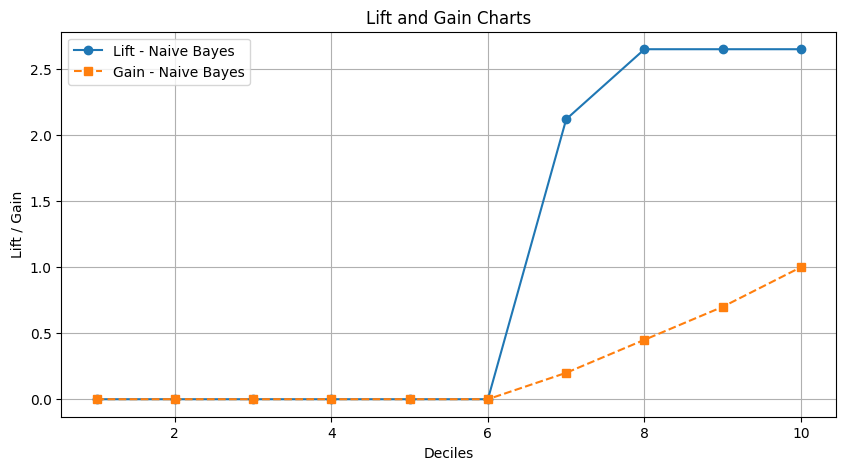

In [37]:
# Plot Lift and Gain charts for Naive Bayes model

# Create a figure and axis for dual plots
fig, ax = plt.subplots(figsize=(10, 5))

# Call function to plot Lift and Gain charts
lift_nb = lift_gain_chart(y_test, nb_test_probs, "Naive Bayes", ax)

# Set labels and titles
ax.set_xlabel("Deciles")
ax.set_ylabel("Lift / Gain")
ax.set_title("Lift and Gain Charts")
ax.legend()
ax.grid()
plt.show()

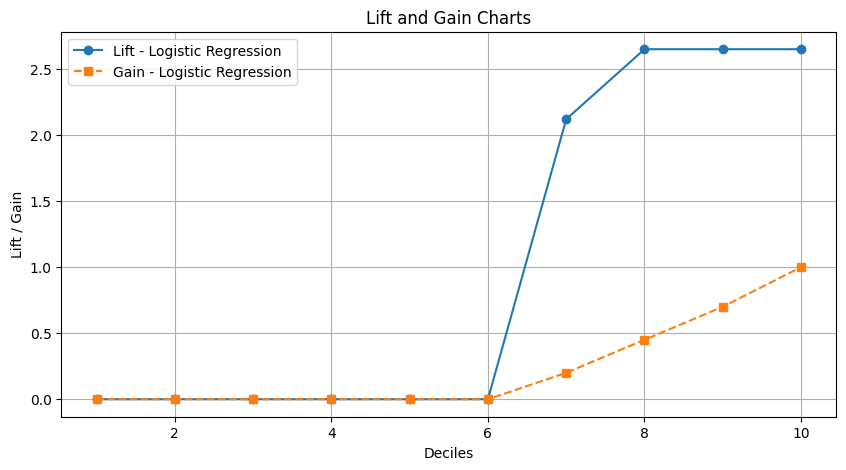

In [38]:
# Plot Lift and Gain chart for Logistic Regression model

# Create a figure and axis for dual plots
fig, ax = plt.subplots(figsize=(10, 5))

# Call function to plot Lift and Gain charts
lift_lr = lift_gain_chart(y_test, lr_test_probs, "Logistic Regression", ax)

# Set labels and titles
ax.set_xlabel("Deciles")
ax.set_ylabel("Lift / Gain")
ax.set_title("Lift and Gain Charts")
ax.legend()
ax.grid()
plt.show()

Evaluate the Lift and Gain charts to understand how well each model ranks the predicted probabilities and how
effective each model is in prioritizing the classification of the two species.

A Gain chart shows the proportion of actual positive cases captured when selecting the top X% of predicted probabilities. A Lift chat measures how the model identifies positive cases better than random selection. Ideally, when a model ranks probabilities effectively, the gain curve rises steeply at the beginning, meaning that the top-ranked predictions capture a high proportion of the actual positive class. Furthermore, the lift curve will be above the baseline when a model assigns higher probabilities to the correct class more effectively than random selection.

The two models, Naive Bayes and Logistic Regression models show the same Lift and Gain charts. The lift and gain values are near zero in the first few deciles until the sixth decile, which points to the model not correctly identifying species in the lower deciles. The lower deciles or predictions may not capture positive classifications well. From deciles 7-8, the lift value rises steeply in both charts from near zero to over 2.5, showing that most correct classifications occur in this range. Additionally, the gain chart increases, indicating that the model successfully classifies more true positives. Lastly, from deciles 9-10, the lift chart steadies at around 2.5, signifying that the model classifies at 2.5 times better than random guessing in the higher deciles. In contrast, the gain curve rises steadily, revealing that the positive classifications are accumulated effectively.

Overall, the steep jump in the lift chart indicates that the model is susceptible to a specific range of probabilities but may not be ranking predictions well before that. A more gradual and consistent increase would be expected in a more balanced model. The first six deciles do not significantly contribute to classification as the model only becomes more effective once it is at the later deciles, suggesting misranked probabilities. Some improvements may be fine-tuning thresholds to capture species' differences earlier in the ranking or improving probability calibration overall to avoid ineffective deciles at the start.

##4. Model Performance Comparison:

Based on the results from accuracy, AUC, and Lift/Gain charts, compare the overall performance of Naive Bayes and Logistic Regression models.

In [39]:
# Create a DataFrame to store the model performance comparison metrics
summary_data = {
    "Metric": ["Train AUC", "Test AUC", "Train Accuracy", "Test Accuracy"] +
              [f"Lift (Decile {i+1})" for i in range(10)],
    "Naive Bayes": [nb_train_auc, nb_test_auc, nb_train_acc, nb_test_acc] + lift_nb,
    "Logistic Regression": [lr_train_auc, lr_test_auc, lr_train_acc, lr_test_acc] + lift_lr
}

summary_df = pd.DataFrame(summary_data)

# Display the table
summary_df

,Metric,Naive Bayes,Logistic Regression
0,Train AUC,1.00,1.00
1,Test AUC,1.00,1.00
2,Train Accuracy,1.00,1.00
3,Test Accuracy,1.00,1.00
4,Lift (Decile 1),0.00,0.00
5,Lift (Decile 2),0.00,0.00
6,Lift (Decile 3),0.00,0.00
7,Lift (Decile 4),0.00,0.00
8,Lift (Decile 5),0.00,0.00
9,Lift (Decile 6),0.00,0.00


Discuss which model performs better in classifying the two penguin species and provide reasons for your
conclusion.

Overall, while the results are the same for the two models (shown by the above table), Naive Bayes and Logistic Regression models, the statistical methods and algorithms they use are inherently different. Generative models follow a Joint distribution and learn how different features and classes are related, whereas Discriminative models follow a Conditional distribution and directly learn the decision boundary between classes. However, for small, well-structured, highly separable, and containing strong feature-target correlations pointing to different species, this dataset performs very well with both model types, and the kind of model selected does not make a significant difference. When a dataset is larger or features are independent, the best-suited model based on the performance will matter significantly.

##5. Performance on a Complex Dataset:

Extend your analysis by applying both Naive Bayes and Logistic Regression to a more complex dataset, such as MNIST (handwritten digits).

In [40]:
# MNIST Dataset Analysis

# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)

# Extract features and labels
X_mnist, y_mnist = mnist.data, mnist.target

In [41]:
X_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y_mnist

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [43]:
# Convert labels to integers
y_mnist = y_mnist.astype(int)

In [44]:
# Split into train and test sets
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

In [45]:
# Normalize or scale pixel values \
# to speed up model training and improve numerical stability
X_train_mnist = X_train_mnist / 255.0
X_test_mnist = X_test_mnist / 255.0

In [46]:
X_train_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_test_mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Train Naive Bayes and Logistic Regression models
nb_mnist = GaussianNB()
lr_mnist = LogisticRegression(max_iter=1000)

nb_mnist.fit(X_train_mnist, y_train_mnist)
lr_mnist.fit(X_train_mnist, y_train_mnist)

LogisticRegression(max_iter=1000)

In [49]:
# Calculate predictions
nb_train_preds_mnist = nb_mnist.predict(X_train_mnist)
lr_train_preds_mnist = lr_mnist.predict(X_train_mnist)
nb_test_preds_mnist = nb_mnist.predict(X_test_mnist)
lr_test_preds_mnist = lr_mnist.predict(X_test_mnist)

In [50]:
# Calculate Accuracy
nb_train_acc_mnist = accuracy_score(y_train_mnist, nb_train_preds_mnist)
lr_train_acc_mnist = accuracy_score(y_train_mnist, lr_train_preds_mnist)
nb_test_acc_mnist = accuracy_score(y_test_mnist, nb_test_preds_mnist)
lr_test_acc_mnist = accuracy_score(y_test_mnist, lr_test_preds_mnist)

In [51]:
# Print Accuracy results
print(f"Naive Bayes Accuracy (Train - MNIST): {nb_train_acc_mnist:.4f}, (Test - MNIST): {nb_test_acc_mnist:.4f}")
print(f"Logistic Regression Accuracy (Train - MNIST): {lr_train_acc_mnist:.4f}, (Test - MNIST): {lr_test_acc_mnist:.4f}")

Naive Bayes Accuracy (Train - MNIST): 0.5524, (Test - MNIST): 0.5516
Logistic Regression Accuracy (Train - MNIST): 0.9392, (Test - MNIST): 0.9204


Compare how the performance of generative models (e.g., Naive Bayes) and discriminative models (e.g., Logistic Regression) differs when dealing with image data (MNIST) compared to the two-species penguin
dataset. Discuss the differences in performance and behavior across these datasets.

The two-species penguin dataset is small, tabular/structured with low dimensionality and correlated features. Because it is a small and structured dataset, generative models like Naive Bayes work well and estimate the distribution directly. Furthermore, discriminative models like Logistic Regression also work well since the dataset has correlated features. When testing both models, the results show that they perform with almost perfect accuracy, AUC, and Lift and Gain scores/plots.

In contrast, the MNIST or image dataset is unstructured, has high dimensionality, and its features are highly correlated. Since there are significantly more dimensions, generative models such as Naive Bayes do not work well, and it is challenging to model the full generative distribution. Additionally, since the features are strongly correlated, the image pixels depend on their neighbors, and the Naive Bayes does not perform well as it assumes feature independence and has a ~55% accuracy. However, discriminative models such as Logistic Regression have a significantly higher performance and thus have a significantly higher accuracy at ~92%. The model can capture nonlinear relationships across pixel intensities and effectively learn the various decision boundaries (rather than estimating the entire distribution). Moreover, other more complex deep learning models like CNNs may outperform the Logistic Regression model on the MNIST dataset.